In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("D:\\Ml_Data\\winequality-red.csv") 

In [13]:
wine_data_attr = wine_data.iloc[:,0:12]
wine_data_attr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH', 'sulphates','alcohol','quality']


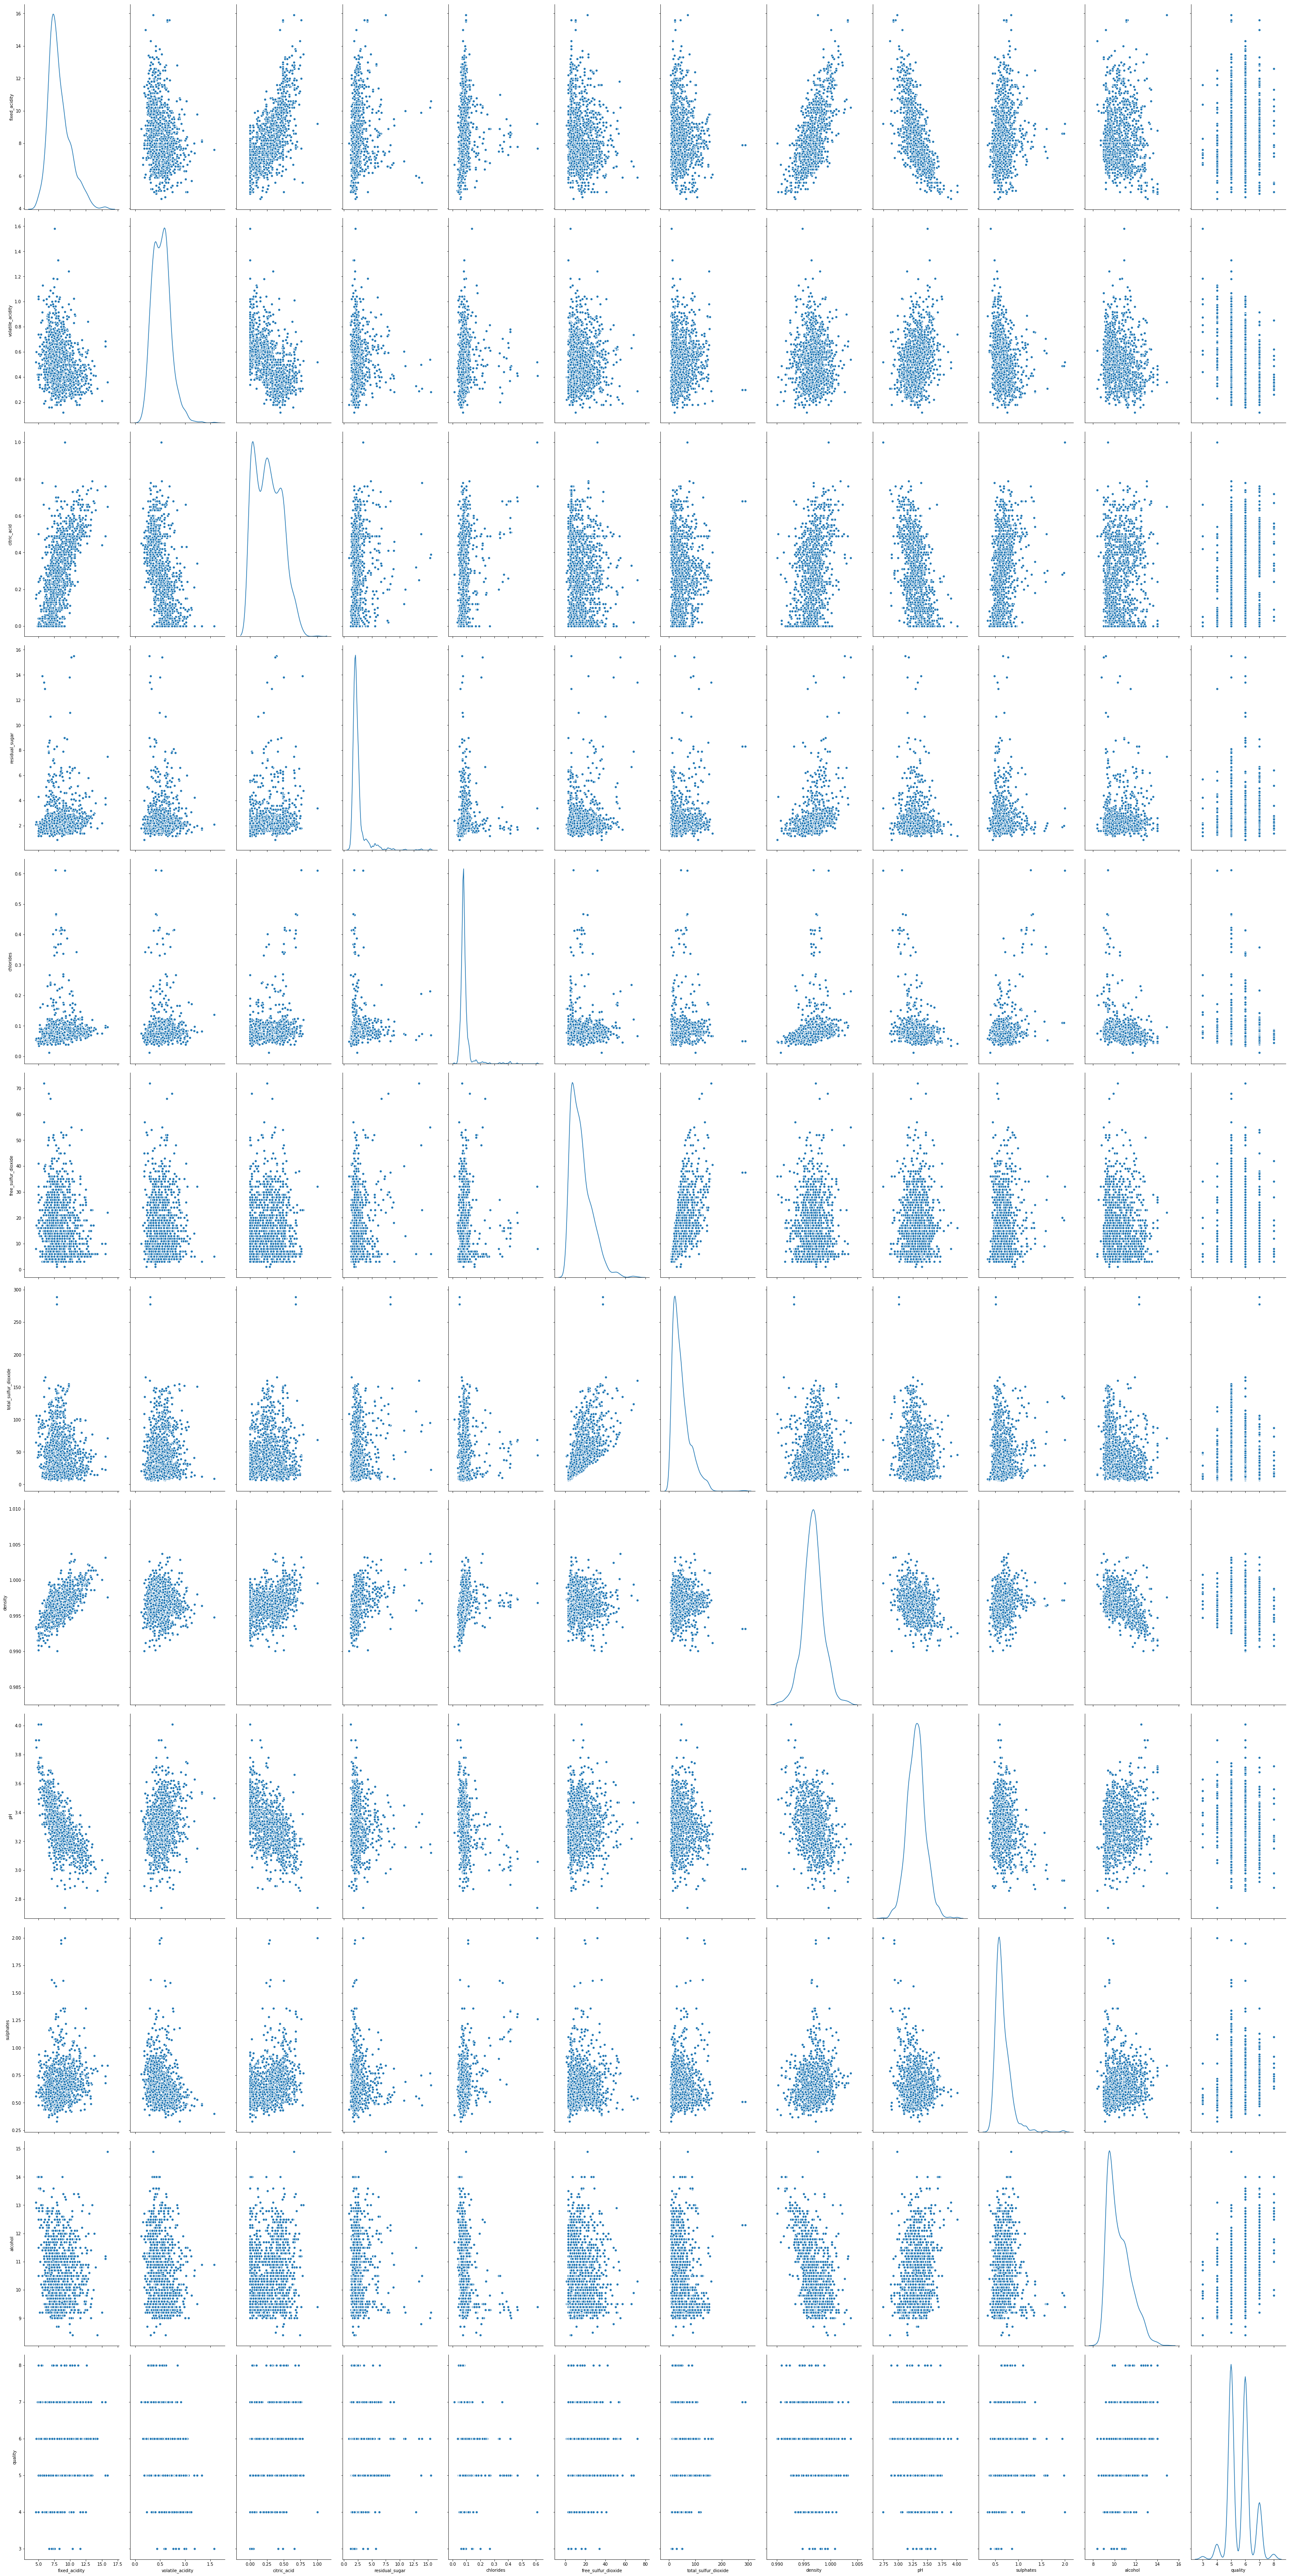

In [15]:
#importing seaborn for statistical plots
import seaborn as sns


sns.pairplot(wine_data, size=7,aspect=0.5 , diag_kind='kde')

In [17]:
from sklearn.cluster import AgglomerativeClustering 

In [18]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [19]:
model.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x000002BC32915048>)

In [20]:
wine_data_attr['labels'] = model.labels_

wine_data_attr.groupby(["labels"]).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,65,65
1,2,2,2,2,2,2,2,2,2,2,2,2
2,589,589,589,589,589,589,589,589,589,589,589,589
3,2,2,2,2,2,2,2,2,2,2,2,2
4,185,185,185,185,185,185,185,185,185,185,185,185
5,756,756,756,756,756,756,756,756,756,756,756,756


In [21]:
wine_clusters = wine_data_attr.groupby(['labels'])

In [22]:
print(wine_clusters)

In [23]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object

In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [25]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [26]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'average')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.8333815767944764

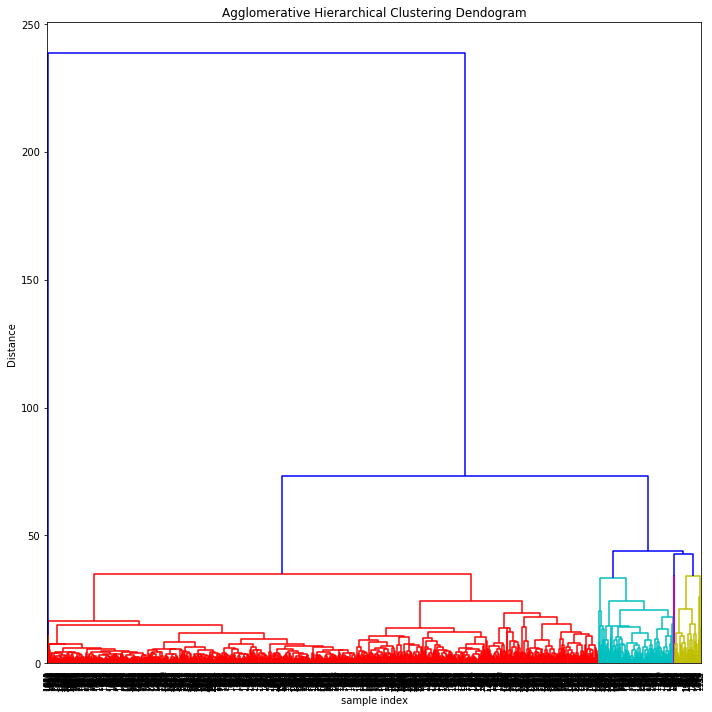

In [30]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'complete')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.8387870482249878

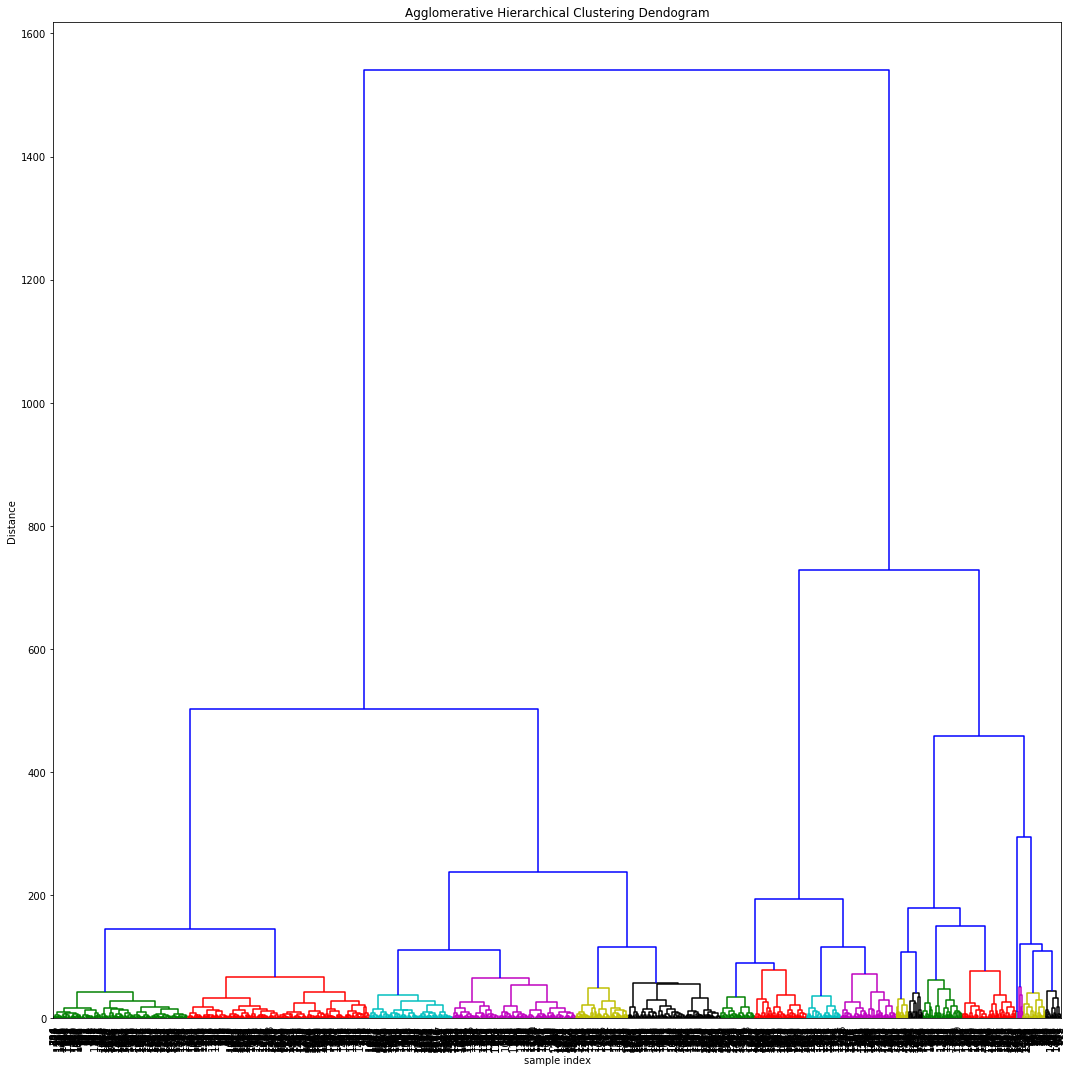

In [36]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [33]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.6688164031714893

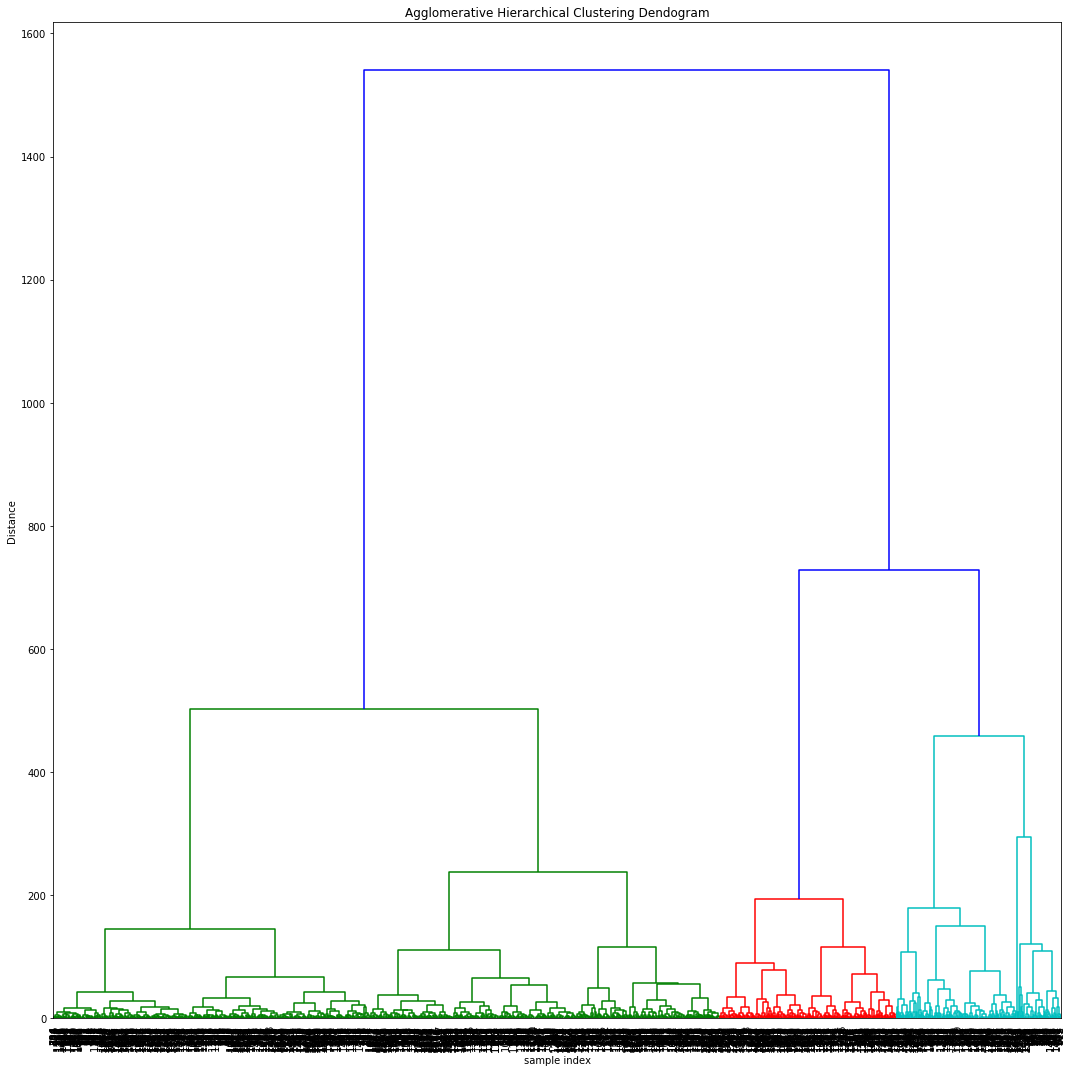

In [35]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()